In [409]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
import glob
from scipy import stats

## 전체 시장 정규성 확인

In [410]:
path = 'foreign_lunage/'
file_list=[]
for a in glob.glob(os.path.join(path, '*.csv')):
    file_list.append(a)

In [411]:
log_change_rate =  np.array([])
for i in file_list:
    df = pd.read_csv(i)
    log_change_rate = np.append(log_change_rate, df.log_change_rate)

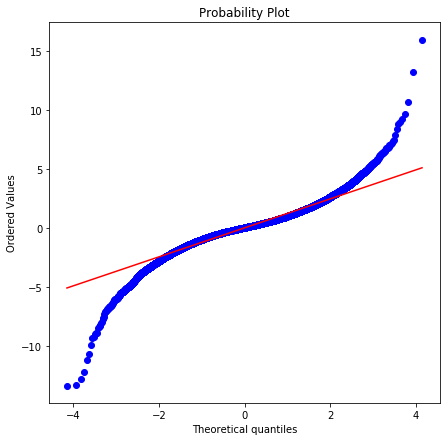

In [412]:
plt.figure(figsize=(7,7))
stats.probplot(log_change_rate, plot=plt)
plt.show()

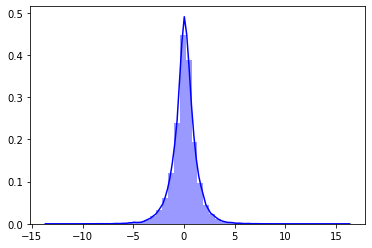

In [413]:
sns.distplot(log_change_rate,color = 'b', hist = True)

# 각 나라별 매월 수익률차이가 0보다 클 확률 binom_test / T-test 실제 분석 (newmoon - fullmoon)

-----

### 표
1. 관측값
2. 15일, 7일 기준
3. NEWMOON, FULLMOON 기준
4. Biomial p-value
5. 매 달 이득을 봐왔던 확률(새로운달 수익률 - 보름달 수익률) months difference
6. difference
7. 표준편차
8. 나라
-----

### 그림
1. 매 달 이득을 봐왔던 확률(새로운달 수익률 - 보름달 수익률) months difference 그림

In [414]:
path = 'korea_lunage/'
file_list=[]
for a in glob.glob(os.path.join(path, '*.csv')):
    file_list.append(a)

In [415]:
def month_7days(df):
    '''
    보름달 새로운달
    df 파일을 넣으면 자동적으로 분석해서 dataframe으로 내보내주는 함수.
    분석 내용: 
    '''
    df_newmoon = df[(3.7 >= df.lunage) | (df.lunage > 25.9)] #월령 25.9 ~ 3.7 까지 (new moon)
    #df_fullmoon = df[(11.1 < df.lunage) & (df.lunage<= 18.5)]#월령 7.4 ~ 22.2 (full moon)
    df_fullmoon = df[(3.7 < df.lunage) & (df.lunage<= 11.1)]#월령 3.7 ~ 11.1 (오른쪽 달)

    
    month = (df_fullmoon.date / 100).round().astype(int)#월 추출을 위해 100으로 나눔 (date는 정수)
    month.name = 'month'
    df_fullmoon = pd.concat([df_fullmoon, month], axis=1).dropna().reset_index(drop=True)#달 정보 추가

    month = (df_newmoon.date / 100).round().astype(int)
    month.name = 'month'
    df_newmoon = pd.concat([df_newmoon, month], axis=1).dropna().reset_index(drop=True)
    
    newmoon_mean = df_newmoon['log_change_rate'].groupby(df_newmoon['month']).mean()
    fullmoon_mean = df_fullmoon['log_change_rate'].groupby(df_fullmoon['month']).mean()
    moon_mean_data = pd.DataFrame({'newmoon_mean':newmoon_mean,'fullmoon_mean':fullmoon_mean })
    x = moon_mean_data[newmoon_mean - fullmoon_mean > 0 ].count()[0]
    n = moon_mean_data.count()[0]
    
    print("==\n\n", df.itemcode.unique()[0])
    print("달(month) 관찰 개수:", n, "달(month) 0보다 큰 개수:", x, "관찰 수익을 볼 확률:", (x/n*100).round())
    
    print("df_newmoon 분산:", np.var(df_newmoon.log_change_rate),"df_fullmoon 분산:",np.var(df_fullmoon.log_change_rate), "시장 전체 분산",np.var(df.log_change_rate))
    print("df_newmoon 표준편차:", np.std(df_newmoon.log_change_rate),"df_fullmoon 표준편차:",np.std(df_fullmoon.log_change_rate), "시장 전체 표준편차",np.std(df.log_change_rate))
    print("df_newmoon 평균:", np.mean(df_newmoon.log_change_rate),"df_fullmoon 평균:",np.mean(df_fullmoon.log_change_rate), "시장 전체 평균",np.mean(df.log_change_rate))

    print("binom test p-value", stats.binom_test(x, n, alternative='two-sided'))
    
    print("df_newmoon - df_fullmoon:", df_newmoon.log_change_rate.mean() - df_fullmoon.log_change_rate.mean())

    print("T-test 결과 !!equal_var=False :", stats.ttest_ind(df_newmoon.log_change_rate, df_fullmoon.log_change_rate, equal_var=False))
    
    
    sns.distplot(df_fullmoon.log_change_rate, rug=True, color='r')
    sns.distplot(df_newmoon.log_change_rate, rug=True,color = 'b')

==

 KOSDAQ
달(month) 관찰 개수: 125 달(month) 0보다 큰 개수: 69 관찰 수익을 볼 확률: 55.0
df_newmoon 분산: 1.4502449238879989 df_fullmoon 분산: 1.7903436068759644 시장 전체 분산 1.5841398629639847
df_newmoon 표준편차: 1.2042611526940488 df_fullmoon 표준편차: 1.3380372217826992 시장 전체 표준편차 1.2586261807876018
df_newmoon 평균: 0.030932389937106928 df_fullmoon 평균: -0.03676257763975154 시장 전체 평균 0.02788605283605283
binom test p-value 0.28308523958274706
df_newmoon - df_fullmoon: 0.06769496757685847
T-test 결과 !!equal_var=False : Ttest_indResult(statistic=0.9508873363970148, pvalue=0.34184289831411163)


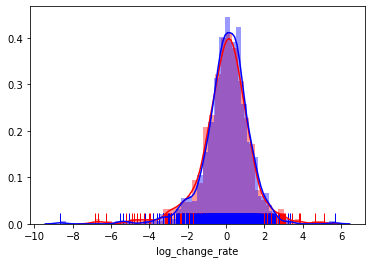

In [416]:
df = pd.read_csv(file_list[0])
month_7days(df)

==

 KOSDAQ
달(month) 관찰 개수: 125 달(month) 0보다 큰 개수: 69 관찰 수익을 볼 확률: 55.0
df_newmoon 분산: 1.4502449238879989 df_fullmoon 분산: 1.7903436068759644 시장 전체 분산 1.5841398629639847
df_newmoon 표준편차: 1.2042611526940488 df_fullmoon 표준편차: 1.3380372217826992 시장 전체 표준편차 1.2586261807876018
df_newmoon 평균: 0.030932389937106928 df_fullmoon 평균: -0.03676257763975154 시장 전체 평균 0.02788605283605283
binom test p-value 0.28308523958274706
df_newmoon - df_fullmoon: 0.06769496757685847
T-test 결과 !!equal_var=False : Ttest_indResult(statistic=0.9508873363970148, pvalue=0.34184289831411163)
==

 KOSPI
달(month) 관찰 개수: 125 달(month) 0보다 큰 개수: 68 관찰 수익을 볼 확률: 54.0
df_newmoon 분산: 0.9674516114646374 df_fullmoon 분산: 1.1002027104384475 시장 전체 분산 1.0286069571605543
df_newmoon 표준편차: 0.9835911810628628 df_fullmoon 표준편차: 1.0489054821281312 시장 전체 표준편차 1.01420262135362
df_newmoon 평균: 0.07371037735849056 df_fullmoon 평균: -0.0020602484472049625 시장 전체 평균 0.022051204351204345
binom test p-value 0.37116069485080966
df_newmoon - df_fullmoon:

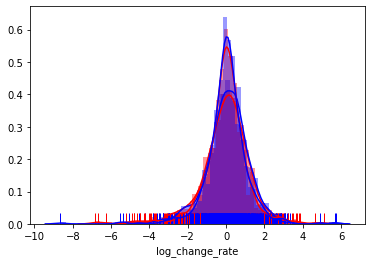

In [417]:
for i in file_list:
    df = pd.read_csv(i)
    month_7days(df)

==

 KOSDAQ
달(month) 관찰 개수: 125 달(month) 0보다 큰 개수: 69 관찰 수익을 볼 확률: 55.0
df_newmoon 분산: 1.4502449238879989 df_fullmoon 분산: 1.7903436068759644 시장 전체 분산 1.5841398629639847
df_newmoon 표준편차: 1.2042611526940488 df_fullmoon 표준편차: 1.3380372217826992 시장 전체 표준편차 1.2586261807876018
df_newmoon 평균: 0.030932389937106928 df_fullmoon 평균: -0.03676257763975154 시장 전체 평균 0.02788605283605283
binom test p-value 0.28308523958274706
df_newmoon - df_fullmoon: 0.06769496757685847
T-test 결과 !!equal_var=False : Ttest_indResult(statistic=0.9508873363970148, pvalue=0.34184289831411163)
==

 KOSPI
달(month) 관찰 개수: 125 달(month) 0보다 큰 개수: 68 관찰 수익을 볼 확률: 54.0
df_newmoon 분산: 0.9674516114646374 df_fullmoon 분산: 1.1002027104384475 시장 전체 분산 1.0286069571605543
df_newmoon 표준편차: 0.9835911810628628 df_fullmoon 표준편차: 1.0489054821281312 시장 전체 표준편차 1.01420262135362
df_newmoon 평균: 0.07371037735849056 df_fullmoon 평균: -0.0020602484472049625 시장 전체 평균 0.022051204351204345
binom test p-value 0.37116069485080966
df_newmoon - df_fullmoon:

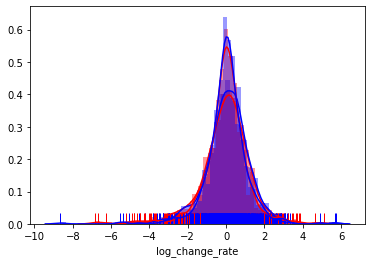

In [418]:
path = 'korea_lunage/'
file_list=[]
for a in glob.glob(os.path.join(path, '*.csv')):
    file_list.append(a)
for i in file_list:
    df = pd.read_csv(i)
    month_7days(df)

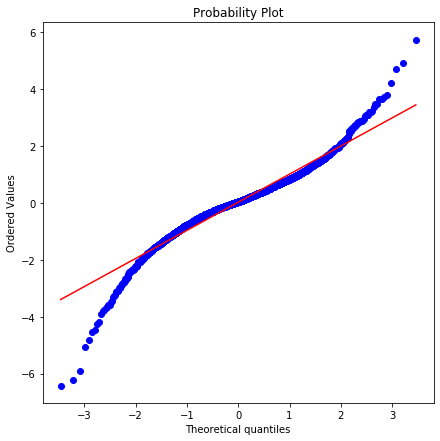

In [419]:
plt.figure(figsize=(7,7))
stats.probplot(df.log_change_rate, plot=plt)
plt.show()

In [420]:
np.random.seed(123)
data1 = np.random.randn(500)*5 +50   #SO: this would have mean 50 and Std dev  5
data2 = np.random.randn(500)*5 +50.1  #SO: this would have mean 55 and Std dev  5
stats.ttest_ind(data1,data2)

Ttest_indResult(statistic=-0.2866167970888493, pvalue=0.774465241307836)

# 보름달 vs 새로운 달(7days) 둘 값의 통계적인 유의함을 검정

In [421]:
def full_new_7days(df):
    '''
    보름달 vs 새로운달
    filelist를 넣으면 자동으로 dataframe를 만들어주는 함수
    '''
    df_newmoon = df[(3.7 >= df.lunage) | (df.lunage > 25.9)] #월령 25.9 ~ 3.7 까지 (new moon)
    df_fullmoon = df[(11.1 < df.lunage) & (df.lunage<= 18.5)]#월령 7.4 ~ 22.2 (full moon)
    #df_fullmoon = df[(3.7 < df.lunage) & (df.lunage<= 11.1)]#월령 3.7 ~ 11.1 (오른쪽 달)

    month = (df_fullmoon.date / 100).round().astype(int)#월 추출을 위해 100으로 나눔 (date는 정수)
    month.name = 'month'
    df_fullmoon = pd.concat([df_fullmoon, month], axis=1).dropna().reset_index(drop=True)#달 정보 추가

    month = (df_newmoon.date / 100).round().astype(int)
    month.name = 'month'
    df_newmoon = pd.concat([df_newmoon, month], axis=1).dropna().reset_index(drop=True)
    
    newmoon_mean = df_newmoon['log_change_rate'].groupby(df_newmoon['month']).mean()
    fullmoon_mean = df_fullmoon['log_change_rate'].groupby(df_fullmoon['month']).mean()
    moon_mean_data = pd.DataFrame({'newmoon_mean':newmoon_mean,'fullmoon_mean':fullmoon_mean })
    x = moon_mean_data[newmoon_mean - fullmoon_mean > 0 ].count()[0]
    n = moon_mean_data.count()[0]
    binom_t = stats.binom_test(x, n)

    newmoon_count = df_newmoon.log_change_rate.count()
    fullmoon_count = df_fullmoon.log_change_rate.count()
    
    newmoon_std = np.std(df_newmoon.log_change_rate)
    fullmoon_std = np.std(df_fullmoon.log_change_rate)
    
    
    #달관측 개수/ 달에서 이득을 볼 확률
    month = (x/n*100)
    
    #둘 사이의 평균 값 차이
    diff_mean = df_newmoon.log_change_rate.mean() - df_fullmoon.log_change_rate.mean()
    newmoon_mean = np.mean(df_newmoon.log_change_rate)
    fullmoon_mean = np.mean(df_fullmoon.log_change_rate)
    
    #t 값과 pvalue 값 저장
    t_statistic, pvalue = stats.ttest_ind(df_newmoon.log_change_rate, df_fullmoon.log_change_rate, equal_var=False)
    
    return newmoon_count, fullmoon_count, newmoon_std, fullmoon_std, month, diff_mean, newmoon_mean, fullmoon_mean, t_statistic, pvalue, n, binom_t, x

In [422]:
newmoon_count = []
fullmoon_count = []
newmoon_std = []
fullmoon_std =[]
month = []
diff_mean = []
newmoon_mean = []
fullmoon_mean =[]
t_statistic =[]
pvalue= []
itemname = []
month_count = []
binom_t = []
x = []
path = 'foreign_lunage/'
file_list=[]
for a in glob.glob(os.path.join(path, '*.csv')):
    file_list.append(a)
for i in file_list:
    df = pd.read_csv(i)
    data = full_new_7days(df)
    
    itemname.append(df.itemcode.unique()[0])
    
    newmoon_count.append(data[0])
    fullmoon_count.append(data[1])
    newmoon_std.append(data[2])
    fullmoon_std.append(data[3])
    month.append(data[4])
    diff_mean.append(data[5])
    newmoon_mean.append(data[6])
    fullmoon_mean.append(data[7])
    t_statistic.append(data[8])
    pvalue.append(data[9])
    month_count.append(data[10])
    binom_t.append(data[11])
    x.append(data[12])

In [423]:
data = full_new_7days(df)

In [424]:
full_new = pd.DataFrame({'newmoon_mean':newmoon_mean, 'fullmoon_mean':fullmoon_mean,'diff_mean':diff_mean, 'pvalue':pvalue, 't_statistic':t_statistic, 'month':month_count,'mon_count':x, 'month_per':month, 'binom_t':binom_t},index= itemname)

In [425]:
full_new.sort_values(["pvalue"])

,newmoon_mean,fullmoon_mean,diff_mean,pvalue,t_statistic,month,mon_count,month_per,binom_t
INI@BSE30,0.105465,-0.008791,0.114256,0.058112,1.896592,125,75,60.000000,0.031409
NII@NI225,0.124172,-0.007267,0.131438,0.074616,1.784295,125,75,60.000000,0.031409
HSI@HSI,0.097050,-0.011565,0.108615,0.103089,1.631230,125,73,58.400000,0.073214
MYI@KLSE,0.076328,0.036996,0.039332,0.232087,1.195583,125,67,53.600000,0.474422
ITI@FTSEMIB,0.062645,-0.018893,0.081539,0.344791,0.945082,125,67,53.600000,0.474422
HAS@HNX,0.096458,0.030882,0.065576,0.413517,0.818146,78,44,56.410256,0.308168
PAS@CAC40,0.060209,0.008031,0.052178,0.448725,0.757768,125,76,60.800000,0.019677
TWS@TI01,0.068061,0.028377,0.039685,0.462218,0.735425,118,66,55.932203,0.231266
KOSPI,0.073710,0.034202,0.039508,0.468675,0.724855,125,68,54.400000,0.371161
SPI@SPX,0.064739,0.031885,0.032854,0.555107,0.590278,125,59,47.200000,0.591684


In [426]:
full_new.mean()

newmoon_mean       0.075773
fullmoon_mean      0.028976
diff_mean          0.046797
pvalue             0.495145
t_statistic        0.740022
month            121.500000
mon_count         66.250000
month_per         54.571810
binom_t            0.401564
dtype: float64

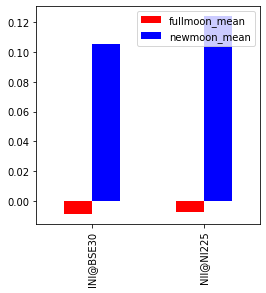

In [427]:
# p value < 0.1 이하인 국가에 대한 bar 그래프
full_new[full_new["pvalue"] < 0.1].loc[:,['fullmoon_mean','newmoon_mean']].plot(kind='bar',figsize=(4,4),color=['red','blue'])

# 상현달 vs 새로운 달(7days) 둘 값의 통계적인 유의함을 검정

In [428]:
def right_7days(df):
    '''
    상현달 vs 새로운달
    filelist를 넣으면 자동으로 dataframe를 만들어주는 함수
    상현달 값을 다룸.
    '''
    df_newmoon = df[(3.7 >= df.lunage) | (df.lunage > 25.9)] #월령 25.9 ~ 3.7 까지 (new moon)
    df_rightmoon = df[(3.7 < df.lunage) & (df.lunage<= 11.1)]#월령 3.7 ~ 11.1 (오른쪽 달)

    month = (df_rightmoon.date / 100).round().astype(int)#월 추출을 위해 100으로 나눔 (date는 정수)
    month.name = 'month'
    df_rightmoon = pd.concat([df_rightmoon, month], axis=1).dropna().reset_index(drop=True)#달 정보 추가

    month = (df_newmoon.date / 100).round().astype(int)
    month.name = 'month'
    df_newmoon = pd.concat([df_newmoon, month], axis=1).dropna().reset_index(drop=True)
    
    newmoon_mean = df_newmoon['log_change_rate'].groupby(df_newmoon['month']).mean()
    rightmoon_mean = df_rightmoon['log_change_rate'].groupby(df_rightmoon['month']).mean()
    moon_mean_data = pd.DataFrame({'newmoon_mean':newmoon_mean,'rightmoon_mean':rightmoon_mean })
    x = moon_mean_data[newmoon_mean - rightmoon_mean > 0 ].count()[0]
    n = moon_mean_data.count()[0]
    binom_t = stats.binom_test(x, n)

    newmoon_count = df_newmoon.log_change_rate.count()
    rightmoon_count = df_rightmoon.log_change_rate.count()
    
    newmoon_std = np.std(df_newmoon.log_change_rate)
    rightmoon_std = np.std(df_rightmoon.log_change_rate)
    
    
    #달관측 개수/ 달에서 이득을 볼 확률
    month = (x/n*100)
    
    #둘 사이의 평균 값 차이
    diff_mean = df_newmoon.log_change_rate.mean() - df_rightmoon.log_change_rate.mean()
    newmoon_mean = np.mean(df_newmoon.log_change_rate)
    rightmoon_mean = np.mean(df_rightmoon.log_change_rate)
    
    #t 값과 pvalue 값 저장
    t_statistic, pvalue = stats.ttest_ind(df_newmoon.log_change_rate, df_rightmoon.log_change_rate, equal_var=False)
    
    return newmoon_count, rightmoon_count, newmoon_std, rightmoon_std, month, diff_mean, newmoon_mean, rightmoon_mean, t_statistic, pvalue, n, binom_t, x

In [429]:
newmoon_count = []
rightmoon_count = []
newmoon_std = []
rightmoon_std =[]
month = []
diff_mean = []
newmoon_mean = []
rightmoon_mean =[]
t_statistic =[]
pvalue= []
itemname = []
month_count = []
path = 'foreign_lunage/'
file_list=[]
binom_t = []
x = []
for a in glob.glob(os.path.join(path, '*.csv')):
    file_list.append(a)
for i in file_list:
    df = pd.read_csv(i)
    data = right_7days(df)
    
    itemname.append(df.itemcode.unique()[0])
    
    newmoon_count.append(data[0])
    rightmoon_count.append(data[1])
    newmoon_std.append(data[2])
    rightmoon_std.append(data[3])
    month.append(data[4])
    diff_mean.append(data[5])
    newmoon_mean.append(data[6])
    rightmoon_mean.append(data[7])
    t_statistic.append(data[8])
    pvalue.append(data[9])
    month_count.append(data[10])
    binom_t.append(data[11])
    x.append(data[12])

In [430]:
right_new = pd.DataFrame({'newmoon_mean':newmoon_mean, 'rightmoon_mean':rightmoon_mean,'diff_mean':diff_mean, 'pvalue':pvalue, 't_statistic':t_statistic, 'month':month_count, 'mon_count':x, 'month_per':month, 'binom_t':binom_t},index= itemname)

In [431]:
right_new.sort_values(["pvalue"])

,newmoon_mean,rightmoon_mean,diff_mean,pvalue,t_statistic,month,mon_count,month_per,binom_t
MYI@KLSE,0.076328,0.005269,0.071059,0.036536,2.093139,125,66,52.800000,0.591684
RUI@RTSI,0.131690,-0.075228,0.206918,0.040453,2.051145,125,67,53.600000,0.474422
NII@NI225,0.124172,-0.018237,0.142409,0.065956,1.840376,125,68,54.400000,0.371161
HSI@HSI,0.097050,-0.031494,0.128544,0.071616,1.803092,125,73,58.400000,0.073214
SPI@SPX,0.064739,-0.013768,0.078508,0.167551,1.380892,125,67,53.600000,0.474422
LNS@FTSE100,0.053114,-0.023125,0.076240,0.170511,1.371329,125,70,56.000000,0.210327
KOSPI,0.073710,-0.002060,0.075771,0.183011,1.332267,125,68,54.400000,0.371161
IDI@JKSE,0.113028,0.040004,0.073024,0.239694,1.176322,123,59,47.967480,0.718509
HAS@HNX,0.096458,0.007830,0.088628,0.287262,1.064882,78,43,55.128205,0.428207
ITI@FTSEMIB,0.062645,-0.025541,0.088186,0.308113,1.019584,125,70,56.000000,0.210327


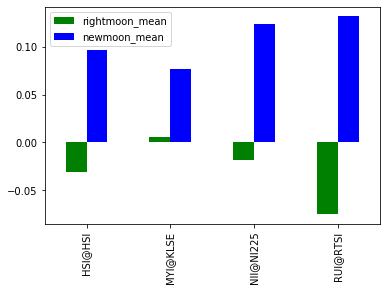

In [432]:
# p value < 0.1 이하인 국가에 대한 bar 그래프
right_new[right_new["pvalue"] < 0.1].loc[:,['rightmoon_mean','newmoon_mean']].plot(kind='bar',figsize=(6,4),color=['g','blue'])

# 보름달 vs 새로운달 / 상현달 vs 새로운 달 일때 p value값 비교
1. 누가 더 새로운 달과 더 의미가 있는지 비교 boxplot 
2. 차이값이 음수인 국가는 제외

In [433]:
right_new_diff_p = right_new[right_new['diff_mean'] > 0].pvalue.values

In [434]:
full_new_diff_p = full_new[full_new['diff_mean'] > 0].pvalue.values

In [435]:
len(right_new_diff_p)

15

In [436]:
len(full_new_diff_p)

13

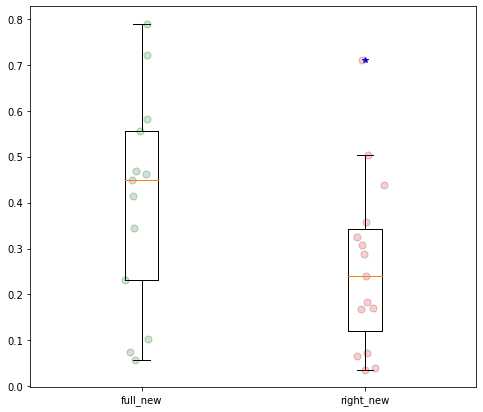

In [437]:
fig, ax = plt.subplots(figsize=(8, 7))
ax.boxplot([full_new_diff_p, right_new_diff_p], sym="b*")
plt.xticks([1, 2], ['full_new', 'right_new'])
x1 = np.random.normal(1, 0.04, len(full_new_diff_p)) #왼쪽 점 들
plt.plot(x1, full_new_diff_p,  mfc =['g','r'][0], mec='k', ms=7, marker="o", linestyle="None",alpha = 0.2)

x2 = np.random.normal(2, 0.04, len(right_new_diff_p)) #오른쪽 점 들
plt.plot(x2, right_new_diff_p,  mfc =['g','r'][1], mec='k', ms=7, marker="o", linestyle="None",alpha = 0.2)
plt.show()

# 매 달 수익률이 새로운 달일때 더 높았던 빈도 비교 (보름달(상현달) - 새로운달) 횟수
1. 차이값이 음수 인 국가를 제외
2. 얼마나 자주 나왔는지 비교

In [438]:
full_new_diff_m

array([60.        , 60.        , 58.4       , 56.41025641, 55.93220339,
       53.6       , 47.2       , 60.8       , 53.6       , 60.        ,
       50.40650407, 52.        , 54.4       ])

In [439]:
70/125

0.56

In [440]:
right_new_diff_m = right_new[right_new['diff_mean'] > 0].month_per.values #차이값이 음수인 국가를 제외하고, 얼마나 자주 나왓는지.
full_new_diff_m = full_new[full_new['diff_mean'] > 0].month_per.values

In [441]:
stats.binom_test(70, 125)

0.2103272547960877

In [442]:
len(right_new_diff_m)

15

In [443]:
len(full_new_diff_m)

13

In [444]:
right_new_diff_m

array([50.4       , 58.4       , 55.12820513, 53.38983051, 50.4       ,
       52.8       , 53.6       , 51.2       , 55.2       , 56.        ,
       54.4       , 47.96747967, 53.6       , 56.        , 54.4       ])

Text(0, 0.5, 'Frequency')

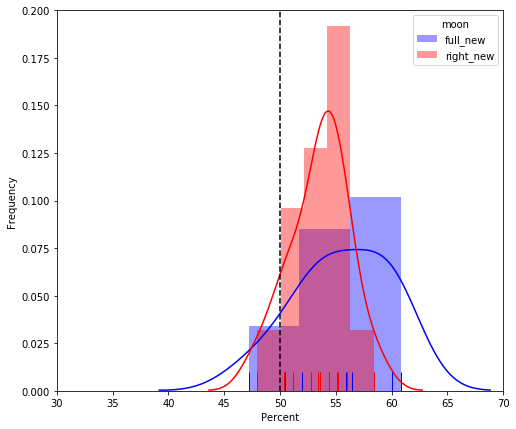

In [445]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.distplot(full_new_diff_m, color = 'b', label="full_new" , hist = True,  rug=True)
sns.distplot(right_new_diff_m, color = 'r', label="right_new" , hist = True,  rug=True)
plt.legend(title="moon")
plt.plot([50,50],[0,1], color ='black', linewidth=1.5, linestyle="--")
plt.xlim(30, 70)
plt.ylim(0, 0.20)
plt.xlabel('Percent')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

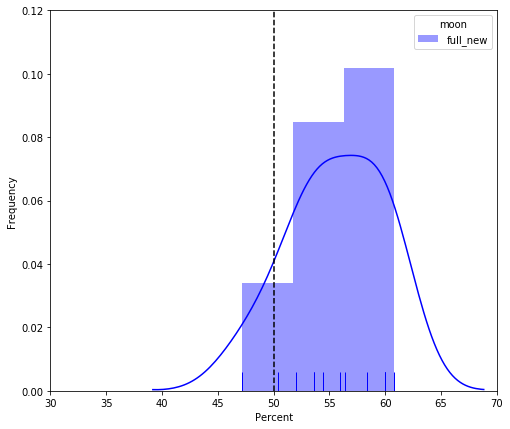

In [446]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.distplot(full_new_diff_m, color = 'b', label="full_new" , hist = True, rug=True)
plt.legend(title="moon")
plt.plot([50,50],[0,1], color ='black', linewidth=1.5, linestyle="--")
plt.xlim(30, 70)
plt.ylim(0, 0.12)
plt.xlabel('Percent')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

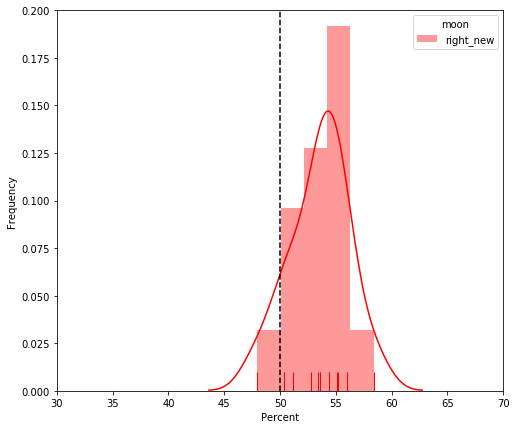

In [447]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.distplot(right_new_diff_m, color = 'r', label="right_new" , hist = True, rug=True)
plt.legend(title="moon")
plt.plot([50,50],[0,1], color ='black', linewidth=1.5, linestyle="--")
plt.xlim(30, 70)
plt.ylim(0, 0.20)
plt.xlabel('Percent')
plt.ylabel('Frequency')

In [448]:
right_new_diff_m

array([50.4       , 58.4       , 55.12820513, 53.38983051, 50.4       ,
       52.8       , 53.6       , 51.2       , 55.2       , 56.        ,
       54.4       , 47.96747967, 53.6       , 56.        , 54.4       ])

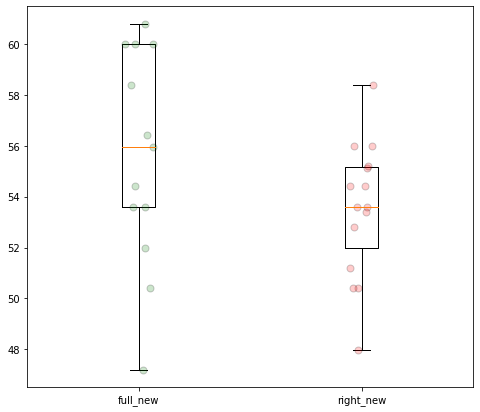

In [385]:
fig, ax = plt.subplots(figsize=(8, 7))
ax.boxplot([full_new_diff_m,right_new_diff_m], sym="b*")
x1 = np.random.normal(1, 0.04, len(full_new_diff_m)) #왼쪽 점 들
plt.plot(x1, full_new_diff_m,  mfc =['g','r'][0], mec='k', ms=7, marker="o", linestyle="None",alpha = 0.2)

x2 = np.random.normal(2, 0.04, len(right_new_diff_m)) #오른쪽 점 들
plt.plot(x2, right_new_diff_m,  mfc =['g','r'][1], mec='k', ms=7, marker="o", linestyle="None",alpha = 0.2)
# plt.title('15day and 7day windows daily log change rate country')
plt.xticks([1, 2], ['full_new', 'right_new'])
plt.show()

# newmoon 효과의 우연성 검증 (p -value가 0.05 이하 만 일단 비교) 
1. 수익률이 제일 잘 나오는 달이 있지 않을까?

In [386]:
path = 'foreign_lunage/'
file_list=[]
for a in glob.glob(os.path.join(path, '*.csv')):
    file_list.append(a)

In [387]:
'''
보름달 vs 새로운 달의 경우, 수익이 오른 달의 총 횟수
'''
df_null = pd.DataFrame(columns=['null'])

for file in file_list:
    df = df = pd.read_csv(file) 

    df_newmoon = df[(3.7 >= df.lunage) | (df.lunage > 25.9)] #월령 25.9 ~ 3.7 까지 (new moon)
    df_fullmoon = df[(11.1 < df.lunage) & (df.lunage<= 18.5)]#월령 7.4 ~ 22.2 (full moon)
    #df_fullmoon = df[(3.7 < df.lunage) & (df.lunage<= 11.1)]#월령 3.7 ~ 11.1 (오른쪽 달)

    month = (df_fullmoon.date / 100).round().astype(int)#월 추출을 위해 100으로 나눔 (date는 정수)
    month.name = 'month'
    df_fullmoon = pd.concat([df_fullmoon, month], axis=1).dropna().reset_index(drop=True)#달 정보 추가

    month = (df_newmoon.date / 100).round().astype(int)
    month.name = 'month'
    df_newmoon = pd.concat([df_newmoon, month], axis=1).dropna().reset_index(drop=True)

    newmoon_mean = df_newmoon['log_change_rate'].groupby(df_newmoon['month']).mean()
    fullmoon_mean = df_fullmoon['log_change_rate'].groupby(df_fullmoon['month']).mean()
    moon_mean_data = pd.DataFrame({'newmoon_mean':newmoon_mean,'fullmoon_mean':fullmoon_mean })
    month_values_counts = pd.Series((((moon_mean_data[newmoon_mean - fullmoon_mean > 0 ].index/100).values - (moon_mean_data[newmoon_mean - fullmoon_mean > 0 ].index/100).values.round()) * 100).astype(int) + 1).value_counts()
    month_vc_df = pd.DataFrame(data=month_values_counts, columns=[df.itemcode.unique()[0]])
    
    df_null = pd.concat([df_null, month_vc_df],sort=False, axis=1)

df_allcountry = df_null.drop('null',axis=1)

Text(0.5, 0, 'month')

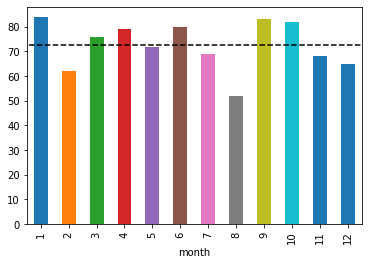

In [388]:
df_allcountry.drop(['XTR@DAX30', 'RUI@RTSI','BRI@BVSP'],axis=1).sum(axis=1).plot(kind='bar')

mean_all = df_allcountry.drop(['XTR@DAX30', 'RUI@RTSI','BRI@BVSP'],axis=1).sum(axis=1).mean()
plt.plot([-1,12],[mean_all,mean_all], color ='black', linewidth=1.5, linestyle="--")

plt.xlabel('month')

In [389]:
df_allcountry.drop(['XTR@DAX30', 'RUI@RTSI','BRI@BVSP'],axis=1).sum(axis=1).sort_values()

8     52
2     62
12    65
11    68
7     69
5     72
3     76
4     79
6     80
10    82
9     83
1     84
dtype: int64

In [390]:
path = 'foreign_lunage/'
file_list=[]
for a in glob.glob(os.path.join(path, '*.csv')):
    file_list.append(a)
df = pd.read_csv(file_list[1]) 

In [391]:
'''
상달 vs 새로운 달의 경우, 수익이 오른 달의 총 횟수
'''
df_null = pd.DataFrame(columns=['null'])

for file in file_list:
    df = df = pd.read_csv(file) 

    df_newmoon = df[(3.7 >= df.lunage) | (df.lunage > 25.9)] #월령 25.9 ~ 3.7 까지 (new moon)
    df_fullmoon = df[(3.7 < df.lunage) & (df.lunage<= 11.1)]#월령 3.7 ~ 11.1 (오른쪽 달)

    month = (df_fullmoon.date / 100).round().astype(int)#월 추출을 위해 100으로 나눔 (date는 정수)
    month.name = 'month'
    df_fullmoon = pd.concat([df_fullmoon, month], axis=1).dropna().reset_index(drop=True)#달 정보 추가

    month = (df_newmoon.date / 100).round().astype(int)
    month.name = 'month'
    df_newmoon = pd.concat([df_newmoon, month], axis=1).dropna().reset_index(drop=True)

    newmoon_mean = df_newmoon['log_change_rate'].groupby(df_newmoon['month']).mean()
    fullmoon_mean = df_fullmoon['log_change_rate'].groupby(df_fullmoon['month']).mean()
    moon_mean_data = pd.DataFrame({'newmoon_mean':newmoon_mean,'fullmoon_mean':fullmoon_mean })
    month_values_counts = pd.Series((((moon_mean_data[newmoon_mean - fullmoon_mean > 0 ].index/100).values - (moon_mean_data[newmoon_mean - fullmoon_mean > 0 ].index/100).values.round()) * 100).astype(int) + 1).value_counts()
    month_vc_df = pd.DataFrame(data=month_values_counts, columns=[df.itemcode.unique()[0]])
    
    df_null = pd.concat([df_null, month_vc_df],sort=False, axis=1)

df_allcountry = df_null.drop('null',axis=1)

Text(0.5, 0, 'month')

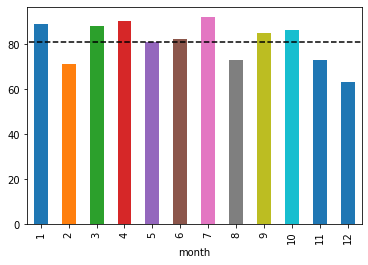

In [392]:
df_allcountry.drop(['SHS@000001'],axis=1).sum(axis=1).plot(kind='bar')

mean_all = df_allcountry.drop(['SHS@000001'],axis=1).sum(axis=1).mean()
plt.plot([-1,12],[mean_all,mean_all], color ='black', linewidth=1.5, linestyle="--")

plt.xlabel('month')

In [393]:
df_allcountry.drop(['XTR@DAX30', 'RUI@RTSI','BRI@BVSP'],axis=1).sum(axis=1).sort_values()

12    54
2     61
11    62
8     65
5     69
9     70
6     72
3     75
4     75
10    76
1     80
7     83
dtype: int64